# Outliers

* An outlier is a data point in a dataset that is distant from all other observations, which is significantly different from the remaining data.

* A data point that lies outside the overall distribution of the dataset.

# What are the impacts of having outliers in a dataset?

1. It causes various  problems during our statistical analysis (It may cause a significant impact on the mean and the standard deviation) Statistics such as the mean and variance are very susceptible to outliers.

2. In Addition, some Machine learning models are sensitive to outliers which may decrease their performance.Thus, depending on which algorithms we wish to train, we often remove outliers from our variables.

# Reasons for Outliers.

1. Data Eentry Errors(Ex:Entering salary as 100000 insted of 1000)

2. Measurments Errors (Ex:Measuring as outlier by analyzing 2 variables at a time)

3. Instrumental Error.

# Types Of Outliers.

1. Univariate Outliers--->Identifing outliers for single variable.

2. Bivariate Outliers--->Identifie as outlier by analyzing 2 variables at a time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("claimants.csv")

In [3]:
df.head()

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
 6   ATTORNEY  1340 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
df.isnull().sum()

CASENUM       0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
ATTORNEY      0
dtype: int64

In [6]:
df['LOSS'].fillna(df["LOSS"].median(),inplace=True)

In [7]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


# Various ways of finding the outlier.

Detection of outliers (based on boxplot)

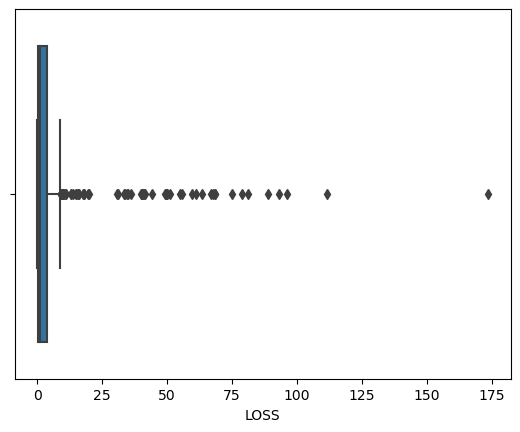

In [8]:
sns.boxplot(x=df["LOSS"])
plt.show()

# Detection of outliers (based on IQR)


* Calculate first(q1) and third quartile(q3).

* Find interquartile range(q3-q1).

* Find lower bound q1-1.5 & find upper bound q3+1.5.

In [9]:
Q1=df["LOSS"].quantile(0.25)
Q1

0.4

In [10]:
Q3=df["LOSS"].quantile(0.75)
Q3

3.7815

In [11]:
IQR=Q3-Q1
IQR

3.3815

In [12]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

lower_limit,upper_limit

(-4.67225, 8.85375)

In [13]:
df[df["LOSS"]>8.85] 

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
11,148,0.0,1.0,0.0,41.0,19.610,0
22,550,0.0,0.0,0.0,38.0,16.161,0
24,580,0.0,1.0,0.0,54.0,10.040,1
43,941,1.0,1.0,0.0,55.0,13.100,1
...,...,...,...,...,...,...,...
1179,30430,1.0,1.0,0.0,37.0,13.789,0
1188,30588,1.0,1.0,0.0,44.0,13.000,0
1256,31159,0.0,1.0,1.0,30.0,30.640,0
1286,33037,1.0,1.0,1.0,44.0,55.709,0


In [14]:
df[df["LOSS"]<-4.67225]

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY


In [15]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


# Dealing the Outliers(3R Technique)


# 1 .Remove (Trimming:remove the outliers from our dataset)

In [18]:
df_trimmed=df[(df["LOSS"]<upper_limit) & (df["LOSS"]>lower_limit)]
df_trimmed

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
5,97,1.0,1.0,0.0,35.0,0.309,0
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


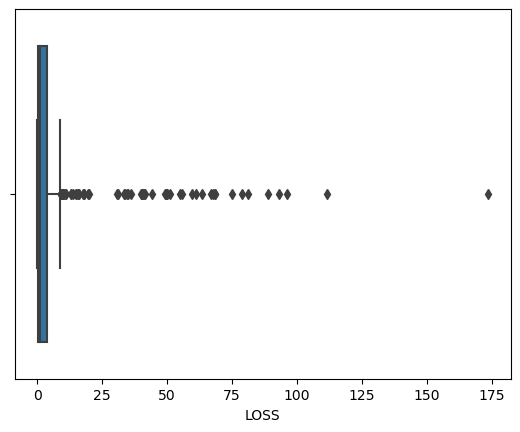

In [20]:
sns.boxplot(x=df["LOSS"])
plt.show()

* We can still see some outliers....

* When we remove data points from our dataset, all the parameters of the distribution are re-calculated,

* those are the mean, quantile and inter-quantile range,

* therefore,in the new-trimmed-variable, values that before were not considered outliers.

* this is an unwanted chacteristic of this way of coping the outlier.

# 2. Replace the outliers(Either winsorizer or arbitrarycapper)

1. Rectify or Replace--->(data entry error)--->Ask and confirm it from the data entry team.

2. Replace with upper limit and lower limit(calculated based on IQR)

In [22]:
pip install feature_engine

                                              0.0/328.9 kB ? eta -:--:--
     -                                        10.2/328.9 kB ? eta -:--:--
     ---                                   30.7/328.9 kB 325.1 kB/s eta 0:00:01
     ---                                   30.7/328.9 kB 325.1 kB/s eta 0:00:01
     ---                                   30.7/328.9 kB 325.1 kB/s eta 0:00:01
     ---                                   30.7/328.9 kB 325.1 kB/s eta 0:00:01
     ---                                   30.7/328.9 kB 325.1 kB/s eta 0:00:01
     ----                                  41.0/328.9 kB 103.4 kB/s eta 0:00:03
     ------                                61.4/328.9 kB 142.2 kB/s eta 0:00:02
     --------                              71.7/328.9 kB 157.1 kB/s eta 0:00:02
     ----------                            92.2/328.9 kB 187.0 kB/s eta 0:00:02
     ----------                            92.2/328.9 kB 187.0 kB/s eta 0:00:02
     ------------                         112.6/328.9

In [24]:
from feature_engine.outliers import winsorizer

In [28]:
from feature_engine.outliers import Winsorizer

win=Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['LOSS'])

df_win = win.fit_transform(df[['LOSS']])

df_win

,LOSS
0,8.85375
1,0.89100
2,0.33000
3,0.03700
4,0.03800
...,...
1335,0.57600
1336,3.70500
1337,0.09900
1338,3.17700


In [29]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'LOSS': -4.67225} {'LOSS': 8.85375}


<Axes: xlabel='LOSS'>

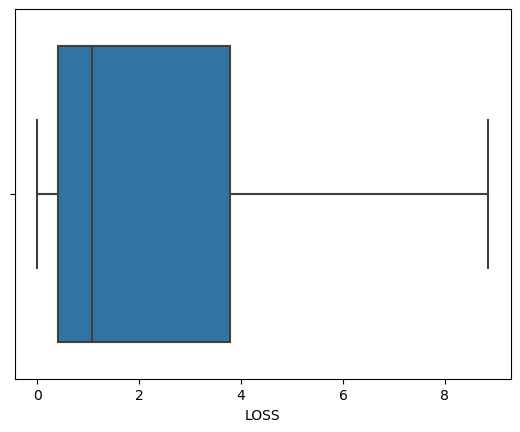

In [30]:
sns.boxplot(x=df_win["LOSS"])

# 3 .Replace Arbitrary Outliers Capper(the minimum and maximum values  by a value determined by the user)

* We get the min and max values based on domain expertise.

In [31]:
from feature_engine.outliers import ArbitraryOutlierCapper

capper = ArbitraryOutlierCapper(max_capping_dict = {'LOSS':6},min_capping_dict={'LOSS':0.03})
# As per ur interest replace outlier with statistical prove.(reserch)

df_c=capper.fit_transform(df[["LOSS"]])

df_c

,LOSS
0,6.000
1,0.891
2,0.330
3,0.037
4,0.038
...,...
1335,0.576
1336,3.705
1337,0.099
1338,3.177


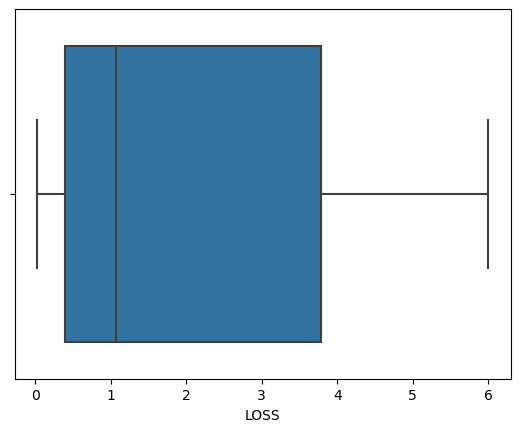

In [32]:
sns.boxplot(x=df_c["LOSS"])
plt.show()

CASENUM     1.060846
CLMSEX     -0.236845
CLMINSUR   -2.818710
SEATBELT    7.474911
CLMAGE      0.410035
LOSS        7.724874
ATTORNEY    0.044838
dtype: float64

# 3. Retain (Consider for analysis)----> Treat them separately

* Big billion days data analyze seperately. 